In [1]:
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
import pandas as pd
df=pd.DataFrame(data=iris.data, columns=['sep_l','sep_w','pet_l','pet_w'])
df['target']=iris.target
df.head()

sep_l  sep_w  pet_l  pet_w  target
0    5.1    3.5    1.4    0.2       0
1    4.9    3.0    1.4    0.2       0
2    4.7    3.2    1.3    0.2       0
3    4.6    3.1    1.5    0.2       0
4    5.0    3.6    1.4    0.2       0

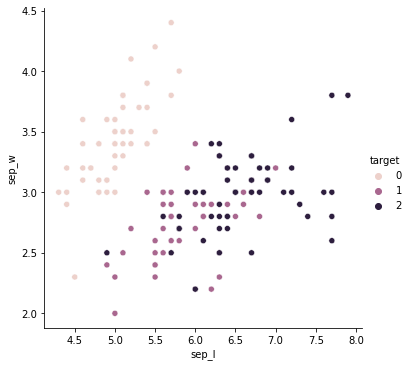

In [9]:
import seaborn as snb
from matplotlib import pyplot as plt
snb.relplot(x='sep_l', y='sep_w', data=df, hue='target')
plt.show()

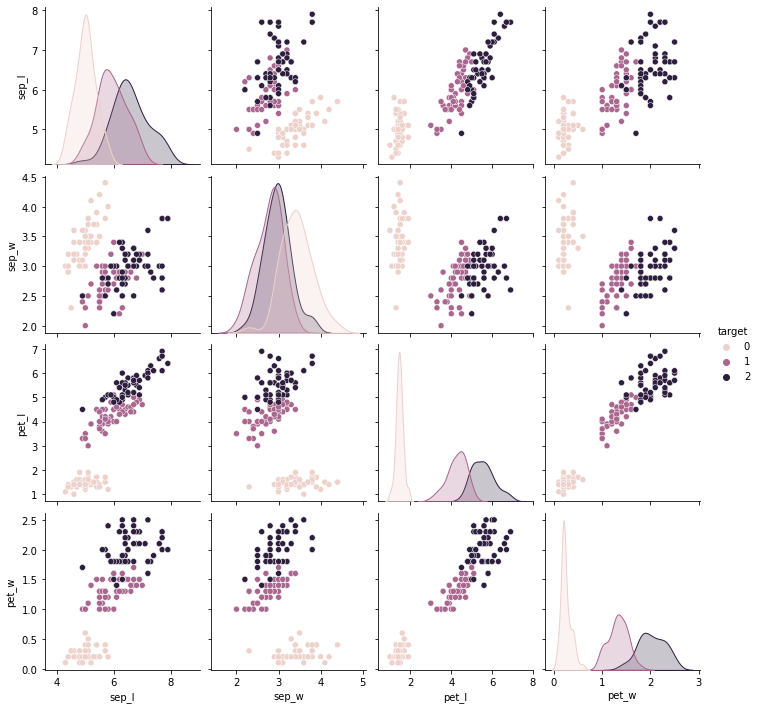

In [10]:
snb.pairplot(df, hue='target')
plt.show()

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
iris_pca=pca.fit_transform(iris.data)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

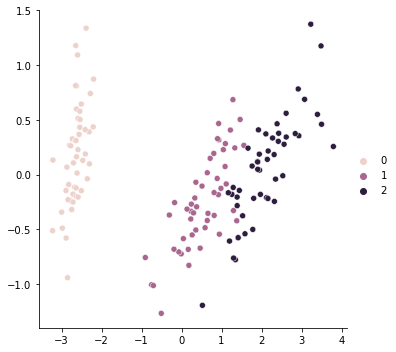

In [12]:
snb.relplot(x=iris_pca[:,0], y=iris_pca[:,1], hue=iris.target)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(iris_pca, iris.target, random_state=0)

In [15]:
X_train.shape

(112, 2)

In [16]:
X_test.shape

(38, 2)

In [19]:
model=RandomForestClassifier(max_depth=10, random_state=12)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.9736842105263158